<a href="https://colab.research.google.com/github/IshaqKHATTAK/Computer-Vision/blob/main/canny_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##canny detctor:
1.   Noise reduction;
2.   Gradient calculation;
3.   Non-maximum suppression;
4.   Double threshold;
5.   Edge Tracking by Hysteresis.







In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import skimage

In [ ]:
# Set high and low threshold ratios
highThresholdRatio = 0.17
lowThresholdRatio = 0.12


In [ ]:
# Load image
img = cv.imread('/content/lake.jpg')

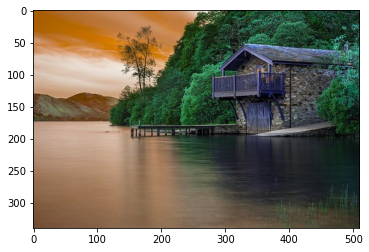

In [ ]:
plt.imshow( img)

In [ ]:
# Convert to grayscale
img_gray = cv.cvtColor(np.float32(img), cv.COLOR_BGR2GRAY)

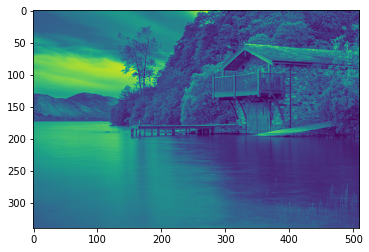

In [ ]:
plt.imshow(img_gray)

In [ ]:
# Apply Gaussian filter
#cv2.GaussianBlur(src, ksize, sigma_x, dst, sigma_y, border_type)
img_smooth = cv.GaussianBlur(img_gray, (5,5), 1)

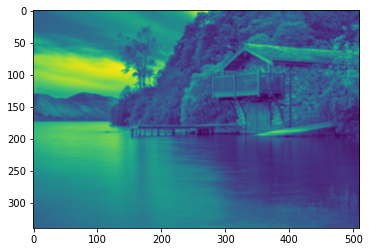

In [ ]:
plt.imshow(img_smooth)
#bluer the image a little bit an order to remove the noise which would be increased by the gradient if it reamin in the iamge.

In [ ]:
# sobel operator for x direction
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
# sobel operator for  y direction
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

In [ ]:
#convolve the sobal operator over the image in the x direction 
Gx = cv.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
#convolve the sobal operator over the image in the y direction 
Gy = cv.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)
#Gx = cv.Sobel(img_smooth, cv.CV_64F, 1, 0, ksize=3)
#Gy = cv.Sobel(img_smooth, cv.CV_64F, 0, 1, ksize=3)

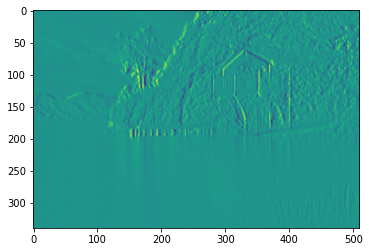

In [ ]:
plt.imshow(Gx)
#the convolution result in x-direction (edges in x direction)

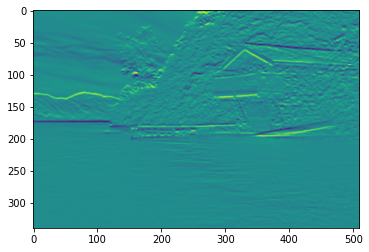

In [ ]:
plt.imshow(Gy)
#the convolution result in y-direction (edges in y direction)

In [ ]:
#now find the megnatude of the intensity change in the pixel values.
# g_m = root((gx)^2 + (gy)^2)
gradient_mag = np.sqrt(Gx**2 + Gy**2)

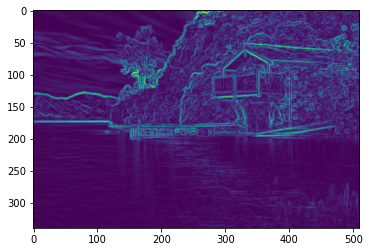

In [ ]:
plt.imshow(gradient_mag)

In [ ]:
#now find the direction of the intensity change in the pixel of the image
#g_d = arctan(gy/gx)
gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

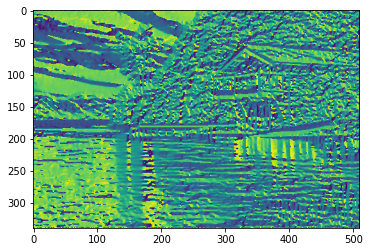

In [ ]:
plt.imshow(gradient_dir)

In [ ]:
# Non-maximum suppression
M, N = img_gray.shape
nms = np.zeros((M, N), dtype=np.int32)
for i in range(1, M-1):
    for j in range(1, N-1):
        dir = gradient_dir[i, j]
        if dir < 0:
            dir += 180
        dir_round = int((dir + 22.5) / 45) % 4
        if dir_round == 0:  # East-West (horizontal)
            if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 1:  # North-East/South-West
            if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 2:  # North-South (vertical)
            if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 3:  # North-West/South-East
            if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                nms[i, j] = gradient_mag[i, j]

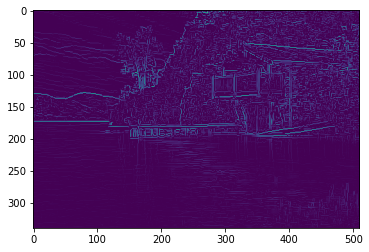

In [ ]:
plt.imshow(nms) #left with just prominant feature

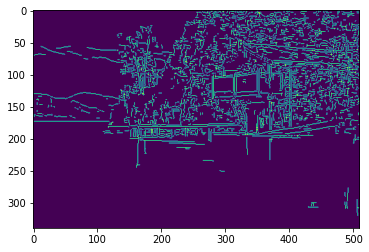

In [ ]:
# Hysteresis thresholding
#it makes the weak pixel into strong pixel using the threasholding value and if any of the pixel in the around 
# pixels are strong.
high_threshold = np.max(nms) * highThresholdRatio
low_threshold = high_threshold * lowThresholdRatio
strong_edges = nms > high_threshold
weak_edges = (nms > low_threshold) & (nms < high_threshold)
for i in range(1, M-1):
    for j in range(1, N-1):
        if weak_edges[i, j]:
            if strong_edges[i-1:i+2, j-1:j+2].any():
                strong_edges[i, j] = True
                weak_edges[i, j] = False

# Display edges
plt.imshow(strong_edges)

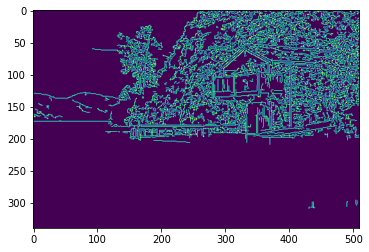

In [ ]:
# Opencv Canny
img = cv.imread('/content/lake.jpg', 0)
edges = edges = cv.Canny(img,100,200)
plt.imshow(edges)

#canny edge detection using prewitt operator matirix edge detection in x and y direction.

In [ ]:
smoth = cv.GaussianBlur(img_gray, (7,7), 1)

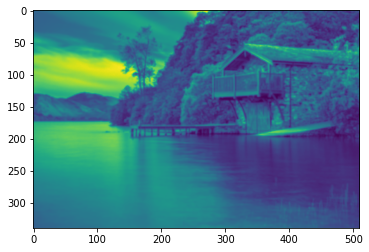

In [ ]:
plt.imshow(smoth)

In [ ]:
pret_x = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
pret_y = np.array([[1,1,1],
      [0,0,0],
      [-1,-1,-1]])

In [ ]:
Gx = cv.filter2D(src=img_smooth, kernel=pret_x, ddepth=-1)
Gy = cv.filter2D(src=img_smooth, kernel=pret_y, ddepth=-1)

In [ ]:
gradient_mag = np.sqrt(Gx**2 + Gy**2)

In [ ]:
direction = np.arctan2(Gy, Gx) * 180 / np.pi

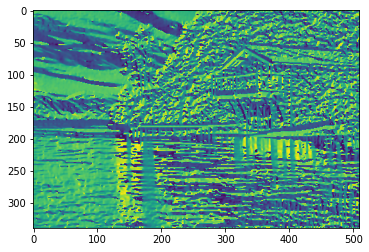

In [ ]:
plt.imshow(direction)

In [ ]:
# Non-maximum suppression
M, N = img_gray.shape
nms = np.zeros((M, N), dtype=np.int32)
for i in range(1, M-1):
    for j in range(1, N-1):
        dir = direction[i, j]
        if dir < 0:
            dir += 180
        dir_round = int((dir + 22.5) / 45) % 4
        if dir_round == 0:  # East-West (horizontal)
            if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 1:  # North-East/South-West
            if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 2:  # North-South (vertical)
            if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 3:  # North-West/South-East
            if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                nms[i, j] = gradient_mag[i, j]

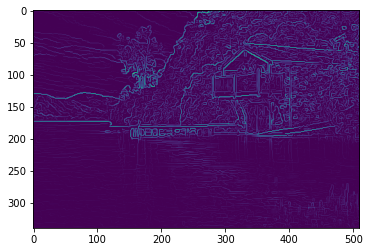

In [ ]:
plt.imshow(nms)

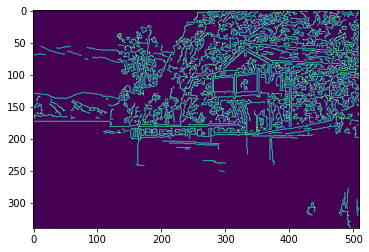

In [ ]:
# Hysteresis thresholding
#it makes the weak pixel into strong pixel using the threasholding value and if any of the pixel in the around 
# pixels are strong.
high_threshold = np.max(nms) * highThresholdRatio
low_threshold = high_threshold * lowThresholdRatio
strong_edges = nms > high_threshold
weak_edges = (nms > low_threshold) & (nms < high_threshold)
for i in range(1, M-1):
    for j in range(1, N-1):
        if weak_edges[i, j]:
            if strong_edges[i-1:i+2, j-1:j+2].any():
                strong_edges[i, j] = True
                weak_edges[i, j] = False

# Display edges
plt.imshow(strong_edges)